### Visualization (시각화)

<img src="https://github.com/qnsekddl1/study-ai/assets/156397913/15956c24-8e81-465c-bc83-10046a32946a" width="600" style="margin-left:0">
<img src="https://github.com/qnsekddl1/study-ai/assets/156397913/bbf03d16-605d-4202-8b4f-fc4d0d776181" width="600" style="margin-left:0">
<img src="https://github.com/qnsekddl1/study-ai/assets/156397913/2de31096-878e-45e7-8524-532b6112e9db" width="600" style="margin-left:0">  

#### 범주형(상품 카테고리: 생활용품, 전자제품, 의류, 학생 수준: High, Medium, Low, 측정년도: 2021, 2022,...)
- 바이올린 차트
- 스캐터 플롯
- 막대 차트
- 누적 막대 차트

#### 수치형 (학번: 1, 2,...., 구매 횟수: 157, 789,..., 가격: 1280.15648,..., 식물의 높이: 10.251,...)
- 막대 차트(숫자 적을 경우)
- 선 그래프(숫자가 많을 경우)
- 바이올린 차트
- 스캐터 플롯
- 히스토그램
- KDE

In [71]:
import pandas as pd

t_df = pd.read_csv('./datasets/titanic.csv')
t_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
t_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
t_df.Age = t_df.Age.fillna(t_df.Age.mean())
t_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [74]:
t_df[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.699118,13.002015,0.42,22.0,29.699118,35.0,80.0


In [75]:
t_df.groupby('Pclass')[['Age']].max()

,Age
Pclass,
1,80.0
2,70.0
3,74.0


In [76]:
t_df.groupby('Pclass')[['Age']].mean()

,Age
Pclass,
1,37.048118
2,29.866958
3,26.403259


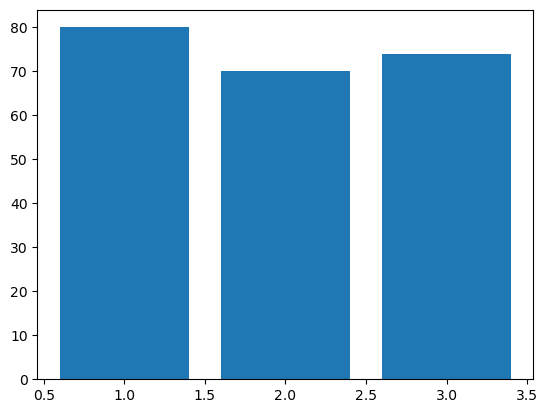

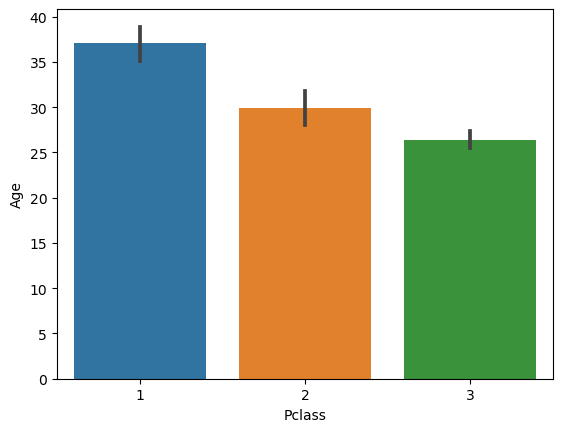

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
# 범주형은 x축, 수치형은 y축(height)으로 설정

# bar

plt.bar(x=t_df.Pclass, height=t_df.Age)
# height는 max값이다.
plt.show()

sns.barplot(x='Pclass', y='Age', data=t_df)
plt.show()
# == seborn 사용 시 평균값으로 y축이 나옴

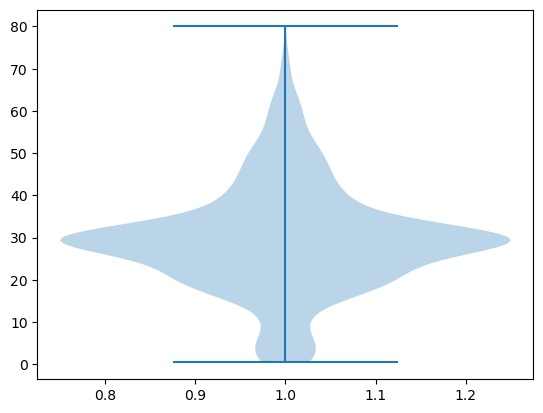

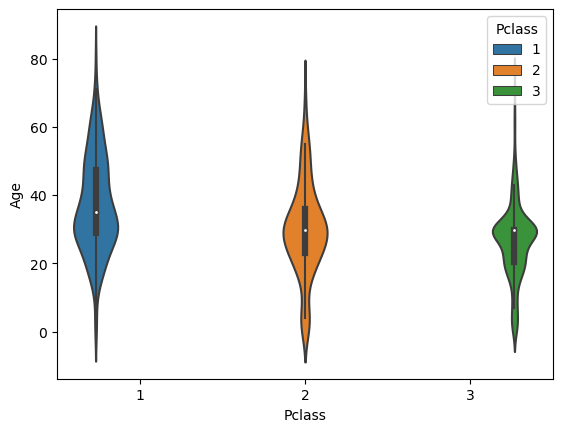

In [78]:
# violin

plt.violinplot(t_df.Age)
plt.show()

# hue로 설정할 feature를 x축으로 설정하면, 여러 개의 군집을 한 번에 볼 수 있다.
sns.violinplot(x='Pclass', y='Age', hue='Pclass', data=t_df)
plt.show()

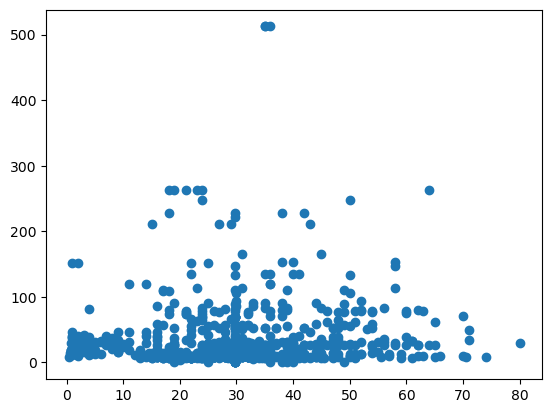

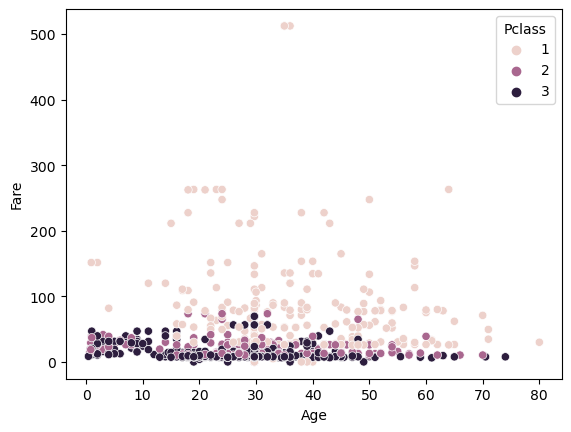

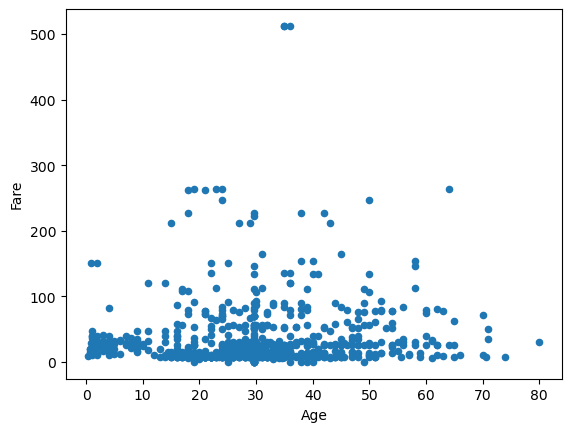

In [79]:
# scatter

plt.scatter(x=t_df.Age, y=t_df.Fare)
plt.show()

# 3차원 그래프는 seaborn을 사용해야함
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=t_df)
plt.show()

t_df.plot(x='Age', y='Fare', kind='scatter')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


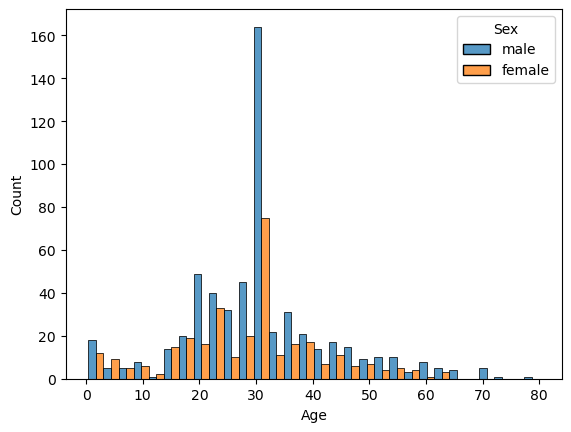

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


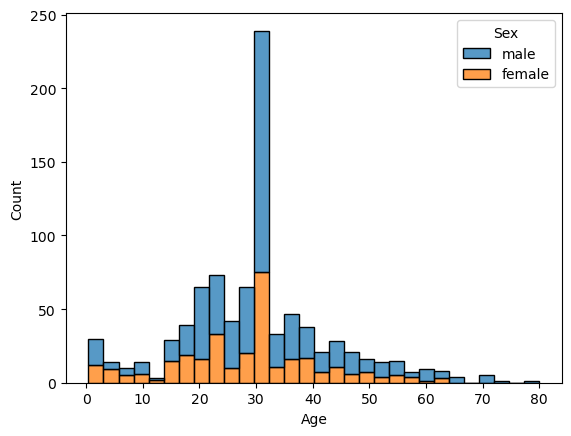

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


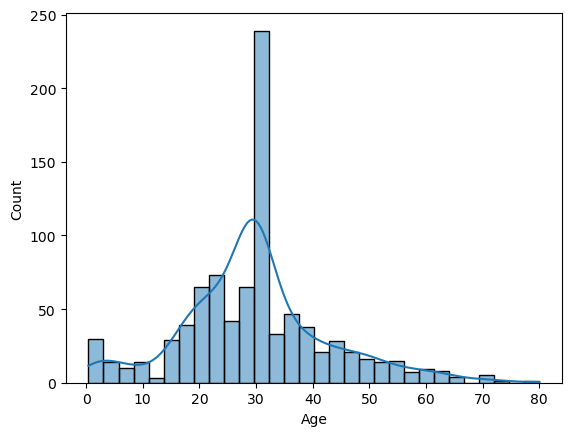

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# y축은 count이다.
sns.histplot(x='Age', data=t_df, hue='Sex', multiple='dodge')
plt.show()

sns.histplot(x='Age', data=t_df, hue='Sex', multiple='stack')
plt.show()

sns.histplot(x='Age', data=t_df, kde=True)
plt.show()

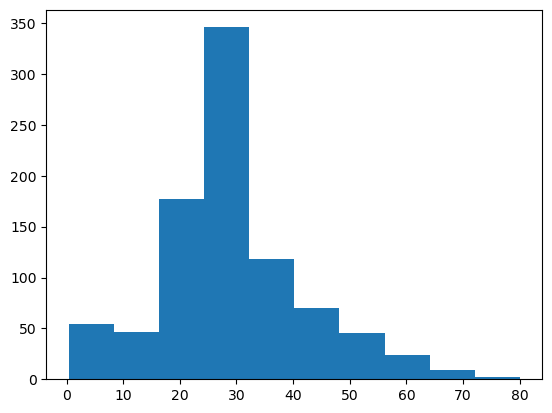

C:\Users\user\AppData\Local\Temp\ipykernel_8808\3956706105.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_df.Age, kde=True, rug=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mod

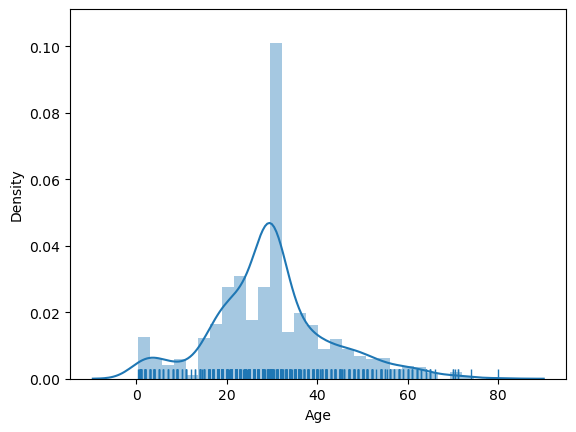

<Axes: >

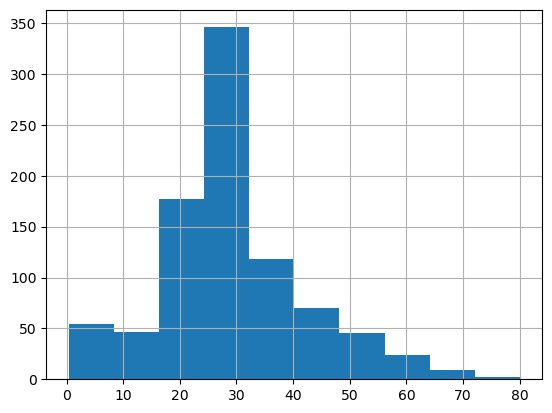

In [81]:
plt.hist(t_df.Age)
plt.show()

sns.distplot(t_df.Age, kde=True, rug=True)
plt.show()

t_df.Age.hist(grid=True)

In [82]:
import pandas as pd

a_df = pd.read_csv('./datasets/avocado.csv')
a_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [83]:
a_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='AveragePrice'>

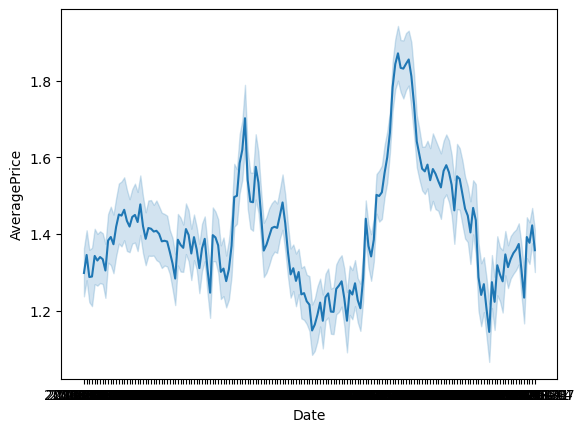

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# x축은 수치형
# y축은 범주형
sns.lineplot(x='Date', y='AveragePrice', data=a_df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_8808\1006605.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=45)


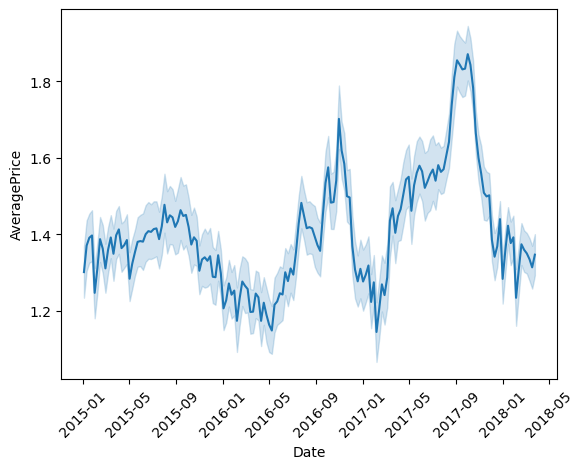

In [85]:
a_df.loc[:, 'Date'] = pd.to_datetime(a_df.Date)
line = sns.lineplot(x='Date', y='AveragePrice', data=a_df)
line.set_xticklabels(line.get_xticklabels(), rotation=45)
plt.show()

# line 뒤의 음영은 최대값, 최소값

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_8808\4215234391.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=45)


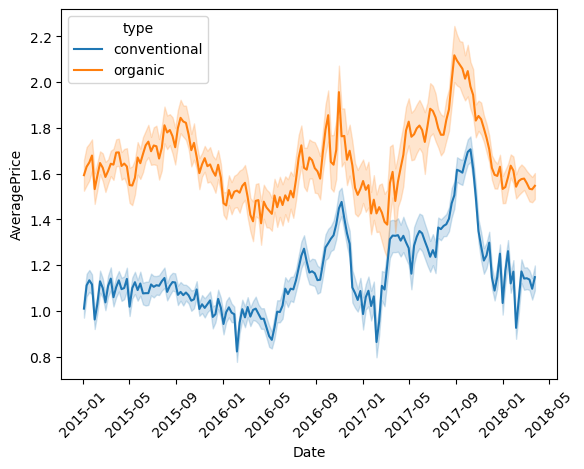

In [86]:
line = sns.lineplot(x='Date', y='AveragePrice', hue='type', data=a_df)
line.set_xticklabels(line.get_xticklabels(), rotation=45)
plt.show()